In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [ ]:
data = pd.read_csv(r'C:\Users\rajat.mathur\PycharmProjects\datasetsandcodefilesstockmarketprediction\Google_train_data.csv')
data.head()

In [ ]:
data = pd.read_csv(r'C:\Users\rajat.mathur\PycharmProjects\datasetsandcodefilesstockmarketprediction\Google_train_data.csv')
data.head()

data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [ ]:
data.info()

In [6]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

data = pd.read_csv(r'C:\Users\rajat.mathur\PycharmProjects\datasetsandcodefilesstockmarketprediction\Google_train_data.csv')
data.head()

data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

data.info()

sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [7]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [10]:
# train the data
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 6s - 163ms/step - loss: 0.0334
Epoch 2/20
35/35 - 3s - 72ms/step - loss: 0.0103
Epoch 3/20
35/35 - 2s - 70ms/step - loss: 0.0105
Epoch 4/20
35/35 - 3s - 73ms/step - loss: 0.0095
Epoch 5/20
35/35 - 2s - 71ms/step - loss: 0.0079
Epoch 6/20
35/35 - 3s - 75ms/step - loss: 0.0071
Epoch 7/20
35/35 - 2s - 68ms/step - loss: 0.0071
Epoch 8/20
35/35 - 2s - 68ms/step - loss: 0.0064
Epoch 9/20
35/35 - 2s - 71ms/step - loss: 0.0074
Epoch 10/20
35/35 - 3s - 74ms/step - loss: 0.0061
Epoch 11/20
35/35 - 3s - 76ms/step - loss: 0.0214
Epoch 12/20
35/35 - 3s - 99ms/step - loss: 0.0083
Epoch 13/20
35/35 - 3s - 94ms/step - loss: 0.0071
Epoch 14/20
35/35 - 3s - 74ms/step - loss: 0.0095
Epoch 15/20
35/35 - 3s - 74ms/step - loss: 0.0058
Epoch 16/20
35/35 - 3s - 72ms/step - loss: 0.0059
Epoch 17/20
35/35 - 3s - 75ms/step - loss: 0.0058
Epoch 18/20
35/35 - 3s - 73ms/step - loss: 0.0057
Epoch 19/20
35/35 - 2s - 70ms/step - loss: 0.0053
Epoch 20/20
35/35 - 3s - 85ms/step - loss: 0.0050


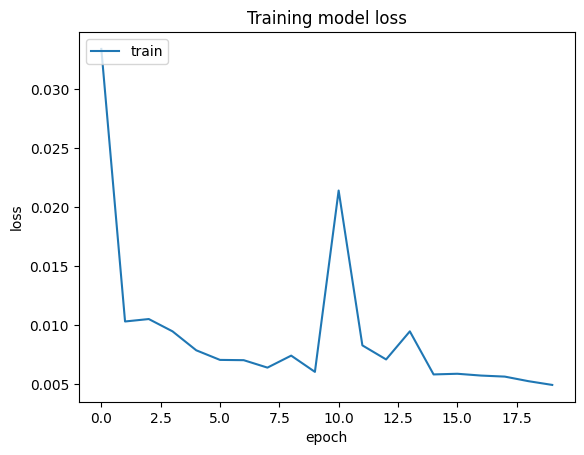

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
testData = pd.read_csv(r'C:\Users\rajat.mathur\PycharmProjects\datasetsandcodefilesstockmarketprediction\Google_train_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1089, 60, 1)

In [14]:
y_pred = model.predict(X_test)
y_pred

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


array([[0.36615166],
       [0.3721666 ],
       [0.37552673],
       ...,
       [0.70754766],
       [0.70230985],
       [0.69691306]], dtype=float32)

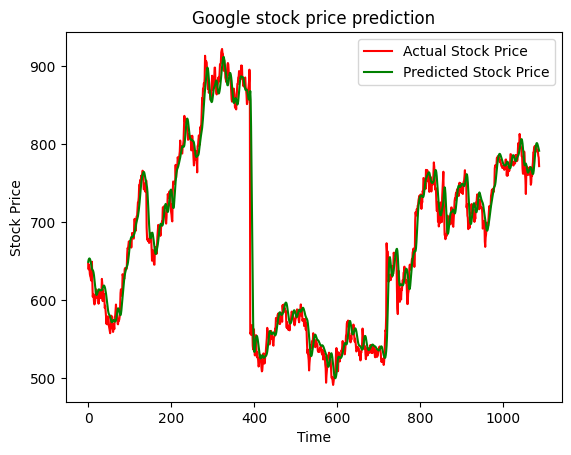

In [15]:
predicted_price = sc.inverse_transform(y_pred)

plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()